In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
df=pd.read_csv("./data/190626-01-E-bottom.csv")

In [3]:
print(df)

      frames  interpolated  measurement_x  measurement_y  objid  position_x  \
0          2           NaN           43.0           26.0   42.0   43.666667   
1          3           NaN           42.0           34.0   42.0   42.062112   
2          4           NaN           36.0           40.0   42.0   36.123946   
3          5           NaN           33.0           44.0   42.0   32.996455   
4          6           NaN           31.0           42.0   42.0   30.978376   
5          7           NaN           40.0           50.0   42.0   39.794652   
6          8           NaN           39.0           67.0   42.0   39.092399   
7          9           NaN           38.0           68.0   42.0   38.042523   
8         10           NaN           36.0           64.0   42.0   36.034072   
9         11           NaN           33.0           63.0   42.0   33.031408   
10        12           NaN           51.0           73.0   42.0   50.638039   
11        13           NaN           50.0           

In [5]:
df.head()

,frames,interpolated,measurement_x,measurement_y,objid,position_x,position_y,pixel_width,pixel_height,manual_tracker_fix
0,2,NaN,43.0,26.0,42.0,43.666667,25.333333,556,231,False
1,3,NaN,42.0,34.0,42.0,42.062112,33.677019,556,231,False
2,4,NaN,36.0,40.0,42.0,36.123946,39.898541,556,231,False
3,5,NaN,33.0,44.0,42.0,32.996455,43.999528,556,231,False
4,6,NaN,31.0,42.0,42.0,30.978376,42.109090,556,231,False


In [6]:
df["heightmm"]=df["measurement_y"]*30/231

In [7]:
df.head()

,frames,interpolated,measurement_x,measurement_y,objid,position_x,position_y,pixel_width,pixel_height,manual_tracker_fix,heightmm
0,2,NaN,43.0,26.0,42.0,43.666667,25.333333,556,231,False,3.376623
1,3,NaN,42.0,34.0,42.0,42.062112,33.677019,556,231,False,4.415584
2,4,NaN,36.0,40.0,42.0,36.123946,39.898541,556,231,False,5.194805
3,5,NaN,33.0,44.0,42.0,32.996455,43.999528,556,231,False,5.714286
4,6,NaN,31.0,42.0,42.0,30.978376,42.109090,556,231,False,5.454545


In [9]:
df["widthmm"]=df["measurement_x"]*80/556
df.head()

,frames,interpolated,measurement_x,measurement_y,objid,position_x,position_y,pixel_width,pixel_height,manual_tracker_fix,heightmm,widthmm
0,2,NaN,43.0,26.0,42.0,43.666667,25.333333,556,231,False,3.376623,6.187050
1,3,NaN,42.0,34.0,42.0,42.062112,33.677019,556,231,False,4.415584,6.043165
2,4,NaN,36.0,40.0,42.0,36.123946,39.898541,556,231,False,5.194805,5.179856
3,5,NaN,33.0,44.0,42.0,32.996455,43.999528,556,231,False,5.714286,4.748201
4,6,NaN,31.0,42.0,42.0,30.978376,42.109090,556,231,False,5.454545,4.460432


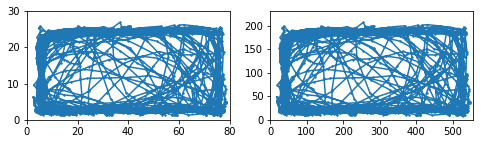

In [11]:
w=np.mean(df["pixel_width"])
h=np.mean(df["pixel_height"])
x=df["position_x"]
y=df["position_y"]

wa=80
ha=30
xa=df["widthmm"]
ya=df["heightmm"]

fig=plt.figure(figsize=(8,2))
ax=fig.add_subplot(1,2,1)
ax.scatter(xa,ya,s=2)
ax.set_xlim(0,wa)
ax.set_ylim(0,ha)
ax.plot(xa,ya)

dx=fig.add_subplot(1,2,2)
dx.scatter(x,y,s=2)
dx.set_xlim(0,w)
dx.set_ylim(0,h)
dx.plot(x,y)

In [15]:
df["previousxinmm"]=df["widthmm"].shift(+1)
df.head()
df["previousyinmm"]=df["heightmm"].shift(+1)
df.head()

,frames,interpolated,measurement_x,measurement_y,objid,position_x,position_y,pixel_width,pixel_height,manual_tracker_fix,heightmm,widthmm,previousxinmm,previousyinmm
0,2,NaN,43.0,26.0,42.0,43.666667,25.333333,556,231,False,3.376623,6.187050,NaN,NaN
1,3,NaN,42.0,34.0,42.0,42.062112,33.677019,556,231,False,4.415584,6.043165,6.187050,3.376623
2,4,NaN,36.0,40.0,42.0,36.123946,39.898541,556,231,False,5.194805,5.179856,6.043165,4.415584
3,5,NaN,33.0,44.0,42.0,32.996455,43.999528,556,231,False,5.714286,4.748201,5.179856,5.194805
4,6,NaN,31.0,42.0,42.0,30.978376,42.109090,556,231,False,5.454545,4.460432,4.748201,5.714286


In [16]:
np.sqrt(5)

2.2360679774997898

In [17]:
7**2

49

In [19]:
df["distance"]=np.sqrt((df["heightmm"]-df["previousyinmm"])**2+(df["widthmm"]-df["previousxinmm"])**2)
df.head()

,frames,interpolated,measurement_x,measurement_y,objid,position_x,position_y,pixel_width,pixel_height,manual_tracker_fix,heightmm,widthmm,previousxinmm,previousyinmm,distance
0,2,NaN,43.0,26.0,42.0,43.666667,25.333333,556,231,False,3.376623,6.187050,NaN,NaN,NaN
1,3,NaN,42.0,34.0,42.0,42.062112,33.677019,556,231,False,4.415584,6.043165,6.187050,3.376623,1.048877
2,4,NaN,36.0,40.0,42.0,36.123946,39.898541,556,231,False,5.194805,5.179856,6.043165,4.415584,1.162965
3,5,NaN,33.0,44.0,42.0,32.996455,43.999528,556,231,False,5.714286,4.748201,5.179856,5.194805,0.675415
4,6,NaN,31.0,42.0,42.0,30.978376,42.109090,556,231,False,5.454545,4.460432,4.748201,5.714286,0.387655


In [20]:
df.describe()

,frames,interpolated,measurement_x,measurement_y,objid,position_x,position_y,pixel_width,pixel_height,heightmm,widthmm,previousxinmm,previousyinmm,distance
count,1800.00000,2.0,1800.000000,1800.000000,1790.0,1800.000000,1800.000000,1800.0,1800.0,1800.000000,1800.000000,1799.000000,1799.000000,1799.000000
mean,901.50000,1.0,254.248611,90.173333,42.0,254.249323,90.177263,556.0,231.0,11.710823,36.582534,36.563439,11.710113,3.802818
std,519.75956,0.0,180.348814,69.636308,0.0,180.464228,69.702925,0.0,0.0,9.043676,25.949470,25.944032,9.046141,2.846276
min,2.00000,1.0,17.000000,9.000000,42.0,16.999845,8.966017,556.0,231.0,1.168831,2.446043,2.446043,1.168831,0.000000
25%,451.75000,1.0,75.500000,21.000000,42.0,74.963927,21.022430,556.0,231.0,2.727273,10.863309,10.791367,2.727273,0.581483
50%,901.50000,1.0,229.000000,73.000000,42.0,228.918710,72.727601,556.0,231.0,9.480519,32.949640,32.805755,9.480519,4.222886
75%,1351.25000,1.0,425.000000,168.000000,42.0,425.140948,167.991269,556.0,231.0,21.818182,61.151079,61.079137,21.818182,6.278703
max,1801.00000,1.0,546.000000,207.000000,42.0,546.000000,206.798489,556.0,231.0,26.883117,78.561151,78.561151,26.883117,10.889845
